# Eigenfaces a

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

In [2]:
# Split data set
# Train_id is the index of each train data in the total data set, test_id the same

from sklearn.model_selection import train_test_split

indices = np.arange(len(face_id[0]))
train_data, test_data, train_id, test_id = train_test_split(face_data.T, indices, test_size = 0.1)
train_data = train_data.T
test_data = test_data.T

print(train_data)
print(train_data.shape)
print(test_data)
print(test_data.shape)

[[ 96  86 116 ... 252  54 121]
 [ 90  88 121 ... 250  52 118]
 [105  82 123 ... 249  48 121]
 ...
 [171 125  64 ...  39 203  47]
 [203 131  56 ...  35 202  46]
 [122 108  60 ...  36 204  44]]
(2576, 468)
[[ 88  91 125 ... 132 210 250]
 [ 88  91 117 ... 139 158 236]
 [ 87  91 125 ... 140 123 167]
 ...
 [226 151  34 ...  47  28  31]
 [211 144  33 ...  45  31  33]
 [179 155  33 ...  38  31  33]]
(2576, 52)


In [36]:
# Count the number of face images for each person 
# in the train and test set after randomly split

train_label = face_id[0,train_id]
unique_train, counts_train = np.unique(train_label, return_counts=True)
dict(zip(unique_train, counts_train))

#test_label = face_id[0,test_id]
#unique_test, counts_test = np.unique(test_label, return_counts=True)
#dict(zip(unique_test, counts_test))


{1: 8,
 2: 9,
 3: 10,
 4: 7,
 5: 9,
 6: 8,
 7: 7,
 8: 10,
 9: 10,
 10: 9,
 11: 10,
 12: 8,
 13: 9,
 14: 9,
 15: 9,
 16: 10,
 17: 10,
 18: 10,
 19: 9,
 20: 9,
 21: 10,
 22: 9,
 23: 8,
 24: 9,
 25: 10,
 26: 10,
 27: 9,
 28: 9,
 29: 10,
 30: 10,
 31: 9,
 32: 8,
 33: 10,
 34: 8,
 35: 9,
 36: 10,
 37: 10,
 38: 8,
 39: 8,
 40: 7,
 41: 9,
 42: 9,
 43: 8,
 44: 9,
 45: 9,
 46: 10,
 47: 9,
 48: 8,
 49: 9,
 50: 7,
 51: 10,
 52: 10}

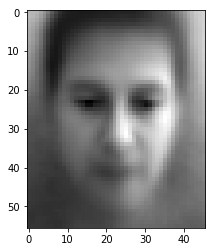

In [3]:
# Compute average face vector

num_train = len(train_data[0])

avg_face = (train_data.mean(axis=1)) / num_train

plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')

In [4]:
# Compute covariance matrix without low-dimensional compution

num_pix = len(train_data)

A = train_data - avg_face.reshape(num_pix,1)
S = (A.dot(A.T)) / num_train

In [5]:
# Compute the egenvalues
# Due to numerical error, some eigenvalues are complex but they have
# negligible imaginary parts. Morover real symetric covariance 
# matrix always has real eigenvalues and eigenvectors.

eigvals, eigvecs = np.linalg.eig(S)
eigvals = eigvals.real
eigvecs = eigvecs.real

In [6]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals.shape)
print(eigvecs.shape)

nonzero_eigvals = eigvals[abs(eigvals) >= 1e-7]
print(nonzero_eigvals.shape)

eigvecs_nonzero_eigvals = eigvecs[:,abs(eigvals) >= 1e-7]
print(eigvecs_nonzero_eigvals.shape)

(2576,)
(2576, 2576)
(468,)
(2576, 468)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(2576, 30)


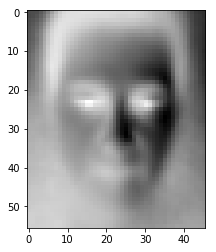

In [7]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces

M = 30 # Number of eigenvectors with M largest eigenvalues to be used

sorted_index = np.argsort(-nonzero_eigvals)[:M]
print(sorted_index)

eigfaces = eigvecs_nonzero_eigvals[:,sorted_index]
print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# Eigenfaces b

In [8]:
# Compute covariance matrix with low-dimensional compution

S_low_dim = ((A.T).dot(A)) / num_train

print(S.shape)
print(S_low_dim.shape)

(2576, 2576)
(468, 468)


In [9]:
# Compute the egenvalues 

eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
eigvals_low_dim = eigvals_low_dim.real
eigvecs_low_dim = eigvecs_low_dim.real

In [10]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals_low_dim.shape)
print(eigvecs_low_dim.shape)

nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
print(nonzero_eigvals_low_dim.shape)

eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
print(eigvecs_nonzero_eigvals_low_dim.shape)

(468,)
(468, 468)
(468,)
(468, 468)


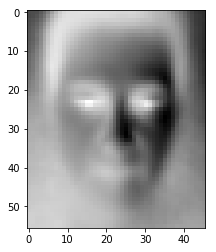

In [11]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces and 
# convert them to the eigenvectors of S and normalize them

eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M]])

eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T

#print(eigfaces_low_dim[:,0])
#print(eigfaces[:,0])
#print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces_low_dim[:,0],(46,56)).T, cmap = 'gist_gray')

# Application of Eigenfaces a (reconstruction)

In [23]:
# Project faces onto eigenfaces

W = (A.T).dot(eigfaces_low_dim) 
# the ith row of w represents the projection of the ith image
# the number of columns is the number of eigenfaces
# the number of rows is number of training data

print(W)

[[-4.97079269e+03  7.68138020e+01 -4.66220002e+02 ...  1.12737910e+01
  -2.46126582e+01 -7.43318442e+01]
 [-4.08785172e+03  1.17096502e+03 -3.10944625e+02 ... -1.72553413e-01
  -1.69038433e+02 -7.67650794e+01]
 [-4.07409080e+03 -3.46041188e+02  6.50845555e+02 ...  1.61774147e+02
  -6.73830024e+01 -9.56997273e+01]
 ...
 [-5.03205390e+03 -2.99607334e+02  3.07437854e+02 ... -3.13337784e+01
   8.68293054e+01  3.50451933e+01]
 [-4.59010025e+03  1.86240837e+03  1.42631392e+02 ... -4.64991232e+01
   5.23395904e+01  3.38664747e+01]
 [-3.36670101e+03 -1.12081629e+02 -2.77348820e+02 ... -1.22315740e+02
  -1.72538378e+01 -4.87699147e+00]]


892.2925028332766


(Text(0.5,1,'Reconstructed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

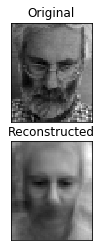

In [24]:
# Face image reconstruction

reconstructed_train_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W.T)

error_train = np.linalg.norm((train_data - reconstructed_train_data),axis=0)
print(np.average(error_train))

plt.subplot(211),plt.imshow(np.reshape(train_data[:,0],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_train_data[:,0],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

# Application of Eigenfaces b (NN classification)

In [28]:
A_test = test_data - avg_face.reshape(num_pix,1)
W_test = (A_test.T).dot(eigfaces_low_dim)

test_results = []
for row in W_test:
    index = np.argmin(np.linalg.norm(row - W, axis=1))
    test_results.append(face_id[0,train_id[index]])
    
true_results = face_id[0,test_id]

print(true_results)
print(test_results)

[43 35 50 24 43 40 15 19 48 34 13 34  6 38 50 48  4 23 38  7 42 40  2 28
 32  7 40 47 41  6 23  7  4  4  1  5 12 39 49 10  1 22 39 50 27 31 14 20
 12 44 32 45]
[36, 40, 50, 24, 11, 32, 15, 21, 36, 8, 39, 32, 6, 36, 50, 48, 4, 23, 52, 7, 49, 35, 2, 36, 32, 7, 40, 33, 48, 51, 23, 33, 4, 4, 1, 5, 12, 39, 27, 1, 1, 11, 39, 45, 27, 31, 14, 20, 12, 42, 32, 45]


In [27]:
test_data.shape

(2576, 52)

In [21]:
avg_face.shape

(2576,)

In [26]:
A_test.shape

(2576, 52)

In [18]:
W_test.shape

(52, 30)

0.5576923076923077
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


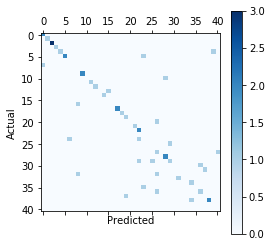

In [29]:
results_error = test_results - true_results

success_rate = np.count_nonzero(results_error == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

(Text(0.5,1,'Reconstructed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

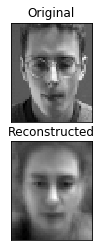

In [33]:
reconstructed_test_data = avg_face.reshape(num_pix,1) + eigfaces_low_dim.dot(W_test.T)

plt.subplot(211),plt.imshow(np.reshape(test_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(np.reshape(reconstructed_test_data[:,1],(46,56)).T, cmap = 'gist_gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])

In [34]:
import time
start = time.time()

# Application of Eigenfaces b (Alternative method learnt)

In [37]:
M_AM = 1

def eigspace_generator(data):
    num_train = len(data[0])
    avg_face = (data.mean(axis=1)) / num_train
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
    
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_AM]]) 
    # Choose all the eigenvectors as eigenfaces in low_dim this case, since the maximum number of eigenfaces would
    # not exceed 10
    
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    list_eig_space.append(eigfaces_low_dim)
    
    list_avg_face.append(avg_face)

    
num_people = max(train_label)
eig_space = np.zeros((num_people,num_pix,M_AM))
sorted_train_data = train_data[:,np.argsort(train_label)]

list_eig_space = [] # Each element of list_eig_space contains the eigenspace of the i+1th person
list_avg_face = [] # Each element of list_avg_face contains the average face of the i+1th person
list_projection = [] # Each element of list_projection contains the projection of the jth test data to different eigenspaces
test_results_AM = []

# Generate all eigenspaces
column = 0
for i in range(num_people):
    num_faces = train_label.tolist().count(i+1)
    eigspace_generator(sorted_train_data[:,column : column + num_faces])
    column += num_faces

    
# Project each test data onto each eigenspace
for j in range(len(test_data[0])): 
    error = [];
    for i in range(num_people): 
        w = (test_data[:,j].T).dot(list_eig_space[i]) # row vector containing projection
        reconstructed_data = np.asarray(list_avg_face[i]).reshape(num_pix,1) + list_eig_space[i].dot(w.T) 
        error.append(np.linalg.norm(test_data[:,j] - reconstructed_data))
    test_results_AM.append(np.argmin(error) + 1)
    print (test_results_AM)


[17]
[17, 52]
[17, 52, 27]
[17, 52, 27, 24]
[17, 52, 27, 24, 43]
[17, 52, 27, 24, 43, 32]
[17, 52, 27, 24, 43, 32, 13]
[17, 52, 27, 24, 43, 32, 13, 21]
[17, 52, 27, 24, 43, 32, 13, 21, 36]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4, 23]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4, 23, 52]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4, 23, 52, 7]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4, 23, 52, 7, 7]
[17, 52, 27, 24, 43, 32, 13, 21, 36, 13, 13, 35, 6, 38, 26, 48, 4, 23, 5

In [42]:
test_data.shape

(2576, 52)

In [24]:
end = time.time()
print(end - start)

196.05754733085632


0.5192307692307693
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


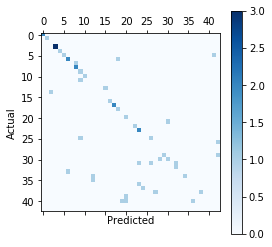

In [38]:
results_error_AM = test_results_AM - true_results

success_rate_AM = np.count_nonzero(results_error_AM == 0) / len(true_results)
print(success_rate_AM)

cm_AM = confusion_matrix(true_results, test_results_AM)

print(cm_AM)
plt.matshow(cm_AM, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()